In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a pandas DataFrame
df = pd.read_csv(r'C:\Users\krish\Downloads\AEP_hourly.csv\AEP_hourly.csv')

# Convert the "Datetime" column to a pandas datetime object and set it as the index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

# Resample the data to daily frequency, aggregating by the sum of energy consumption values
df_daily = df.resample('D').sum()

# Perform seasonal decomposition of the time series
decomposition = seasonal_decompose(df_daily, period=365)


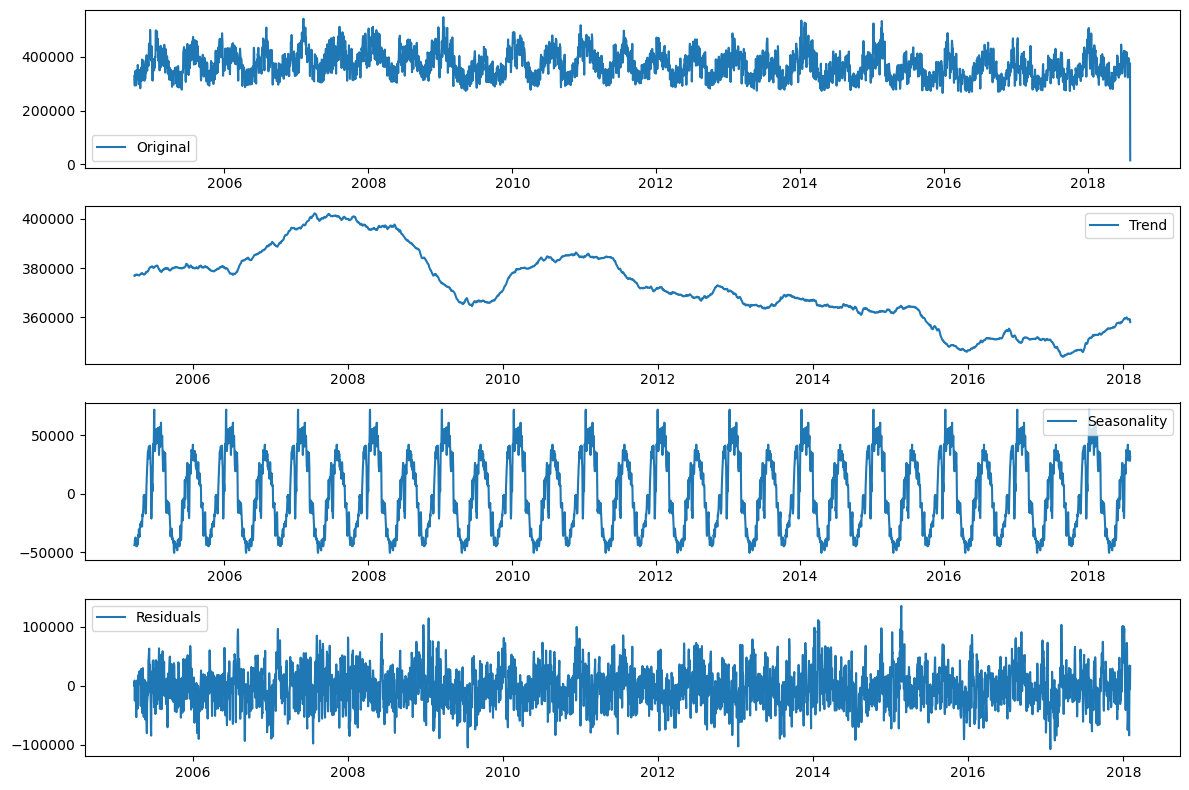

In [2]:
# Plot the decomposition results
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_daily, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [3]:
# Test for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_daily['AEP_MW'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -7.2795963551457294
p-value: 1.5125837189548453e-10
Critical Values:
1%: -3.4316522779278373
5%: -2.8621154666284063
10%: -2.5670763214801435


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


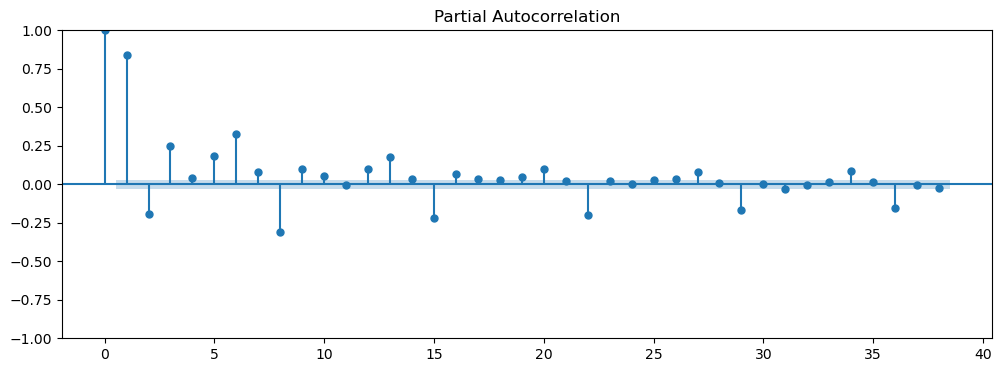

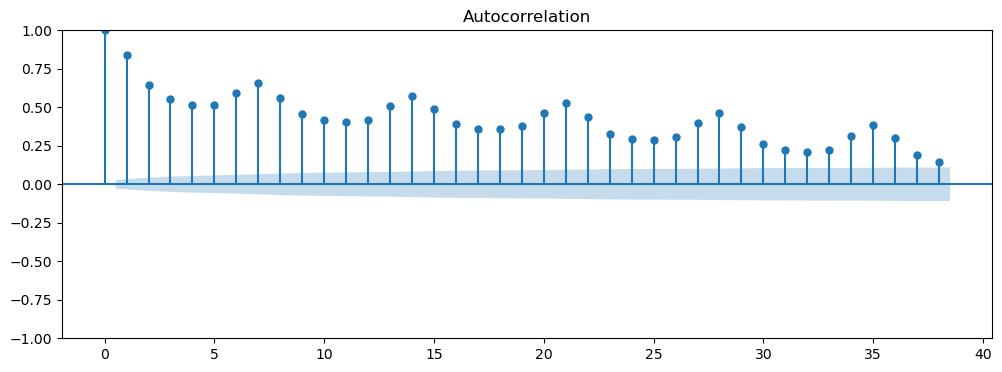

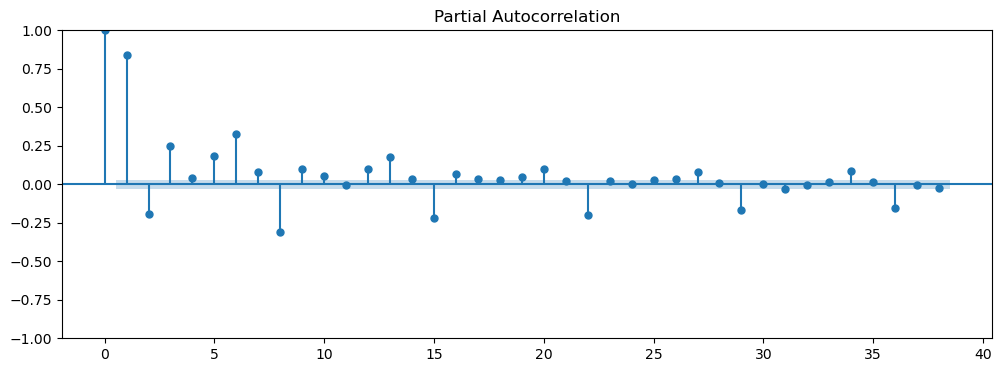

In [4]:
# Plot the autocorrelation and partial autocorrelation functions
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df_daily, ax=ax)
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(df_daily, ax=ax)

In [5]:
# Fit an ARIMA model
model = ARIMA(df_daily, order=(1, 1, 1))
results = model.fit()

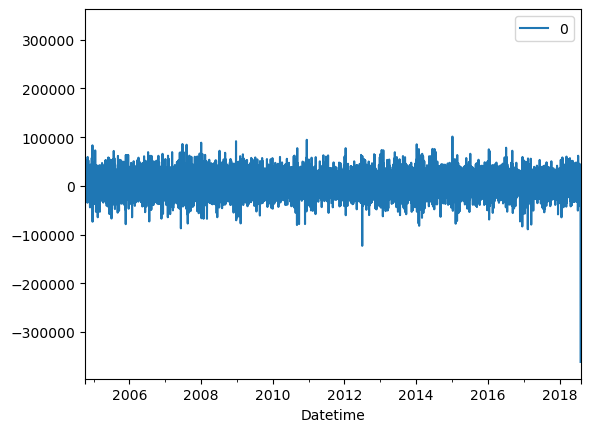

In [6]:
#Plot the residuals of the model
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()


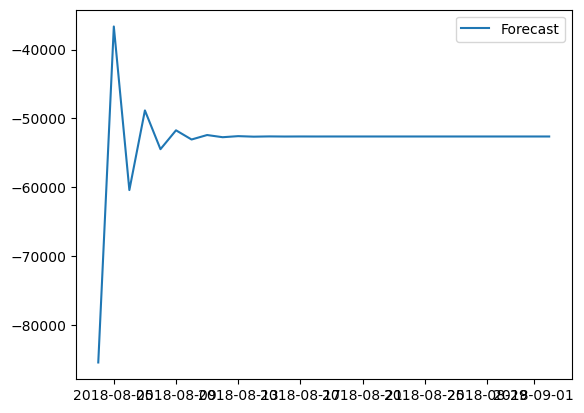

In [10]:
# Forecast future energy consumption
forecast_values = results.forecast(steps=30)
plt.plot(forecast_values, label='Forecast')
plt.legend()
plt.show()